In [ ]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=ResourceWarning)

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import HTML

from pyclee import DyClee, DyCleeContext
from pyclee.forgetting import ExponentialForgettingMethod
from pyclee.plotting import ElementPlotter, CentroidPlotter, BoundaryPlotter, MultiPlotter
from tests.datasets import make_orbiting_blobs

mpl.rcParams['animation.embed_limit'] = 2**32

# Static: noisy blobs

In [2]:
# Generate blobs
blobs, y = make_blobs(1500, random_state=8)
state = np.random.RandomState(0)

# Append some uniform noise spread across the frame
X = StandardScaler().fit_transform(np.vstack((blobs, state.uniform(blobs.min(), blobs.max(), size=(len(blobs)//10, 2)))))

# Shuffle
state.shuffle(X)

# Calculate bounds for DyCleeContext
bounds = np.column_stack((X.min(axis=0), X.max(axis=0)))

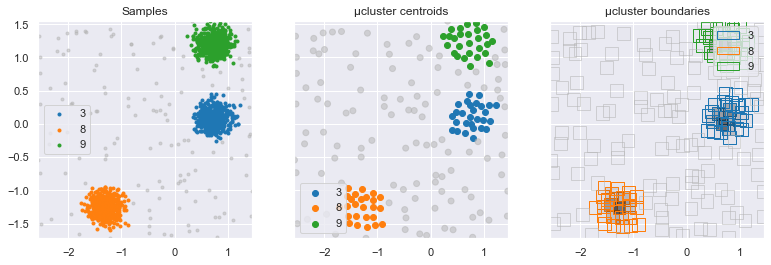

In [3]:
# Set up the context with 2 dimensions and hyperbox size fraction 0.06 of feature range
# (store_elements is required only for the samples plot generated by [ElementPlotter/MultiPlotter].plot_snapshot)
context = DyCleeContext(2, 0.06, bounds, store_elements=True)

# Initialise algorithm
dy = DyClee(context)

# Run through the entire dataset
clusters = dy.run(X)

# Plot the final state
MultiPlotter(dy).plot_snapshot(clusters)

# Concept drift: orbiting blobs

In [4]:
# See tests/datasets.py
blobs, y = make_orbiting_blobs(3000, cluster_std=0.5)
X = StandardScaler().fit_transform(blobs)
bounds = np.column_stack((X.min(axis=0), X.max(axis=0)))

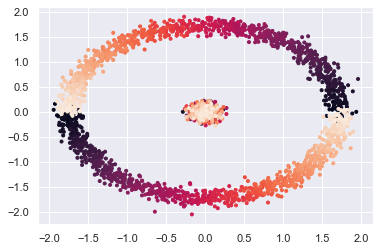

In [5]:
# Show the dataset, with colour indicating the index of each sample
plt.scatter(X[:, 0], X[:, 1], c=np.arange(len(X)), marker='.')

In [ ]:
# Create the context as above, but adding a forgetting function
context = DyCleeContext(2, 0.06, bounds, forgetting_method=ExponentialForgettingMethod(0.01))
dy = DyClee(context)

# Pass dataset to plotting class to animate each step of the algorithm and create JS animation
html = BoundaryPlotter(dy).animate(X).to_jshtml()
plt.close()  # This prevents the drawing of a separate frame in addition to the animation
HTML(html)

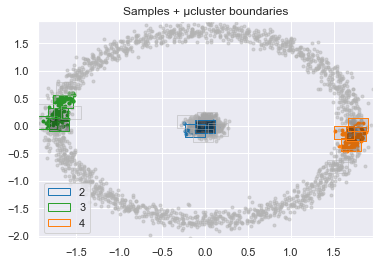

In [7]:
# As above
context = DyCleeContext(2, 0.06, bounds, forgetting_method=ExponentialForgettingMethod(0.01), store_elements=True)
dy = DyClee(context)

# Run the dataset through the algorithm
clusters = dy.run(X)

# Create target axis to be shared by all plots
fig, ax = plt.subplots()
# Plot the final state (on a shared axis, and excluding the centroids plot)
MultiPlotter(dy, ax, centroids=False).plot_snapshot(clusters)